In [1]:
import os
import sys
import cv2
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import *
from keras.callbacks import *
from keras.utils import np_utils
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.preprocessing import *
from keras.optimizers import Adam,SGD,RMSprop
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

Using TensorFlow backend.
D:\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:522

In [2]:
def read_images_labels(path, i):
    for files in os.listdir(path):
        abs_path = os.path.abspath(os.path.join(path, files))
        if os.path.isdir(abs_path):
            i += 1
            temp = os.path.split(abs_path)[-1]
            listdir.append(temp)
            read_images_labels(abs_path, i)
            amount = int(len(os.listdir(path)))
            print(amount)
            sys.stdout.write('\r' + '>' * i + '' * (amount - i) + '[%s%%]' % (i * 100 / amount) + temp)
        else:
            if files.endswith('.jpg'):#endswith() 方法用于判断字符串是否以指定后缀结尾
                image = cv2.resize(cv2.imread(abs_path), (64, 64))
                images.append(image)
                labels.append(i-1)
    return images, labels, listdir

In [3]:
images = []
labels = []
listdir = []

In [4]:
def read_main(path):
    images, labels, listdir = read_images_labels(path, i=0)
    images = np.array(images, dtype=np.float32)/255
    labels = np_utils.to_categorical(labels, num_classes=20)
    np.savetxt('listdir.txt', listdir, delimiter='', fmt='%s')
    return images, labels

In [5]:
images, labels=read_main('train/characters-20')
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

20
>[5.0%]abraham_grampa_simpson20
>>[10.0%]apu_nahasapeemapetilon20
>>>[15.0%]bart_simpson20
>>>>[20.0%]charles_montgomery_burns20
>>>>>[25.0%]chief_wiggum20
>>>>>>[30.0%]comic_book_guy20
>>>>>>>[35.0%]edna_krabappel20
>>>>>>>>[40.0%]homer_simpson20
>>>>>>>>>[45.0%]kent_brockman20
>>>>>>>>>>[50.0%]krusty_the_clown20
>>>>>>>>>>>[55.0%]lenny_leonard20
>>>>>>>>>>>>[60.0%]lisa_simpson20
>>>>>>>>>>>>>[65.0%]marge_simpson20
>>>>>>>>>>>>>>[70.0%]mayor_quimby20
>>>>>>>>>>>>>>>[75.0%]milhouse_van_houten20
>>>>>>>>>>>>>>>>[80.0%]moe_szyslak20
>>>>>>>>>>>>>>>>>[85.0%]ned_flanders20
>>>>>>>>>>>>>>>>>>[90.0%]nelson_muntz20
>>>>>>>>>>>>>>>>>>>[95.0%]principal_skinner20
>>>>>>>>>>>>>>>>>>>>[100.0%]sideshow_bob(17593, 64, 64, 3)
(17593, 20)
(1955, 64, 64, 3)
(1955, 20)


In [6]:
'''
base_model=VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
add_model=Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256,activation='relu'))
add_model.add(Dense(20,activation='sigmoid'))
model=Model(inputs=base_model.input, outputs=add_model(base_model.output))

sgd=SGD(lr=0.008, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
'''

"\nbase_model=VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])\nadd_model=Sequential()\nadd_model.add(Flatten(input_shape=base_model.output_shape[1:]))\nadd_model.add(Dense(256,activation='relu'))\nadd_model.add(Dense(20,activation='sigmoid'))\nmodel=Model(inputs=base_model.input, outputs=add_model(base_model.output))\n\nsgd=SGD(lr=0.008, momentum=0.9, decay=1e-6, nesterov=True)\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n"

In [7]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3 , padding='same',activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))
model.summary()

sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
__________

In [8]:
datagen = ImageDataGenerator(zoom_range=0.1,
                             width_shift_range=0.05,
                             height_shift_range=0.05,
                             horizontal_flip=True)
datagen.fit(X_train)

In [9]:
#epochs = 600
epochs = 65
#batch_size = 256
batch_size = 128
file_name = str(epochs) + '_debug' + str(batch_size)

In [10]:
# cbks = [
#     EarlyStopping(monitor='val_loss', patience=50),
#     TensorBoard(log_dir='logs/' + file_name)
# ]
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
#           shuffle=True, verbose=1,
#           validation_data=(X_test, y_test), callbacks=[cbks])
#history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=epochs, epochs=epochs,
         #validation_data=(X_test, y_test), verbose=1)
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=150, epochs=epochs,
         validation_data=(X_test, y_test), verbose=1)

Epoch 1/65
150/150 [==============================] - 38s 254ms/step - loss: 2.7374 - acc: 0.1547 - val_loss: 2.3486 - val_acc: 0.2762
Epoch 2/65
150/150 [==============================] - 33s 223ms/step - loss: 2.1664 - acc: 0.3408 - val_loss: 1.7174 - val_acc: 0.4936
Epoch 3/65
150/150 [==============================] - 33s 223ms/step - loss: 1.5709 - acc: 0.5248 - val_loss: 1.2075 - val_acc: 0.6471
Epoch 4/65
150/150 [==============================] - 33s 222ms/step - loss: 1.1722 - acc: 0.6483 - val_loss: 0.8624 - val_acc: 0.7412
Epoch 5/65
150/150 [==============================] - 34s 226ms/step - loss: 0.9451 - acc: 0.7161 - val_loss: 0.6906 - val_acc: 0.8061
Epoch 6/65
150/150 [==============================] - 34s 224ms/step - loss: 0.7707 - acc: 0.7667 - val_loss: 0.6710 - val_acc: 0.8153
Epoch 7/65
150/150 [==============================] - 33s 223ms/step - loss: 0.6740 - acc: 0.7971 - val_loss: 0.5207 - val_acc: 0.8501
Epoch 8/65
150/150 [==============================] - 3

150/150 [==============================] - 33s 222ms/step - loss: 0.1811 - acc: 0.9488 - val_loss: 0.2412 - val_acc: 0.9483
Epoch 62/65
150/150 [==============================] - 33s 223ms/step - loss: 0.1526 - acc: 0.9544 - val_loss: 0.2837 - val_acc: 0.9391
Epoch 63/65
150/150 [==============================] - 33s 222ms/step - loss: 0.1564 - acc: 0.9557 - val_loss: 0.2577 - val_acc: 0.9381
Epoch 64/65
150/150 [==============================] - 33s 223ms/step - loss: 0.1614 - acc: 0.9545 - val_loss: 0.2932 - val_acc: 0.9391
Epoch 65/65
150/150 [==============================] - 34s 224ms/step - loss: 0.1441 - acc: 0.9581 - val_loss: 0.2861 - val_acc: 0.9432


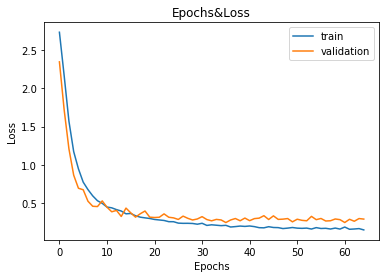

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Epochs&Loss')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

In [12]:
#model.save('h5/' + file_name + 'debug.h5')
model.save(file_name)

score = model.evaluate(X_test, y_test, verbose=0)

print (score)

[0.2860685829576925, 0.9432225063938618]


In [13]:
def read_image(path):
    images = []
    for i in range(990):
        image = cv2.resize(cv2.imread(path + str(i + 1) + '.jpg'), (64, 64))
        images.append(image)
    images = np.array(images, dtype=np.float32) / 255
    return images


images = read_image('test/test/')


In [14]:
def transform(listdir, label, size):
    label_str = []
    for i in range(size):
        temp = listdir[label[i]]
        label_str.append(temp)
    return label_str

In [15]:
print(images.shape)

model = load_model(file_name)
#predict = model.predict_classes(images, verbose=1)
predict = model.predict(images, verbose=1)
predict=np.argmax(predict,axis=1)
print(predict)
listdir = np.loadtxt('listdir.txt', dtype='str')
label_str = transform(listdir, predict, images.shape[0])

#pd.DataFrame(("id":list(range(1,len(label_str)+1)),"character":label_str)) to_csv('test_score.csv', index=False, header=True)

(990, 64, 64, 3)
990/990 [==============================] - 1s 918us/step
[17  8 16 16  9 11 14 15 12 10 14 13 18 11  7 14 13  9 10  8  9  2  9  7
  2  0 13 11 10 14 10  7  1  7  0  7 12  3  3 14  1  3  4 16  2  6 12  1
 18 19  4  7 10  6 11 13  2  9 17 10 15  5 15 10  8 16 10  4  6 15  9  3
  6  5 18 15 11 14  4 10  2 19  6 13  7 11  9  9 19  2 17  4 19 18 18 18
  8  8  9  1  9 16  2 15  5 19 16  9 16 12 13 18  3 18 14 10  3  1 14 16
  1  1  4  4 11 19 12  4 11  1 19 15 14  6  7  2  3  8  2 12  7 18  3  1
  3  1 11 10 18  8 14  0  4  1 13  1 10 15  7 13  7  1  1  2  5 18 12 11
 19  8 19  1  2  1 19  4 19 18  1  4 10  3 18  1  5  8 18  1 11  4 16 14
 12  9 14 17  1 16 15  7 19 18  0  6 14  4  4 17  7 10 18 18 16  1  3  1
 13  0  5 12  6  4 12 16 14  7 11  7 15  2  2  1 14 12  0 16  6 10  5  5
 13  1  6 11  1 14 12  6  3  8 15  7  6  0  3  1 18 19  6  9 11  8  2  6
  5  7  0  4 14 10  7  0  1  1  1  5  2 15 19  2 19  1  6 13  1 17  9  0
 17  3 12 17 18  8  9  3 12 13  7 15  6 16 17 13  

In [16]:
with open('test_score.csv', 'w') as f:
    w = csv.writer(f)
    w.writerow(['id', 'character'])
    for i, y in enumerate(label_str, 1):
        w.writerow([i, y])